# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Общая информация

In [1]:
import pandas as pd

df=pd.read_csv('C:\\Users\\Huawei\\Desktop\\real_estate_data.csv', delimiter='\t')

In [2]:
df.head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

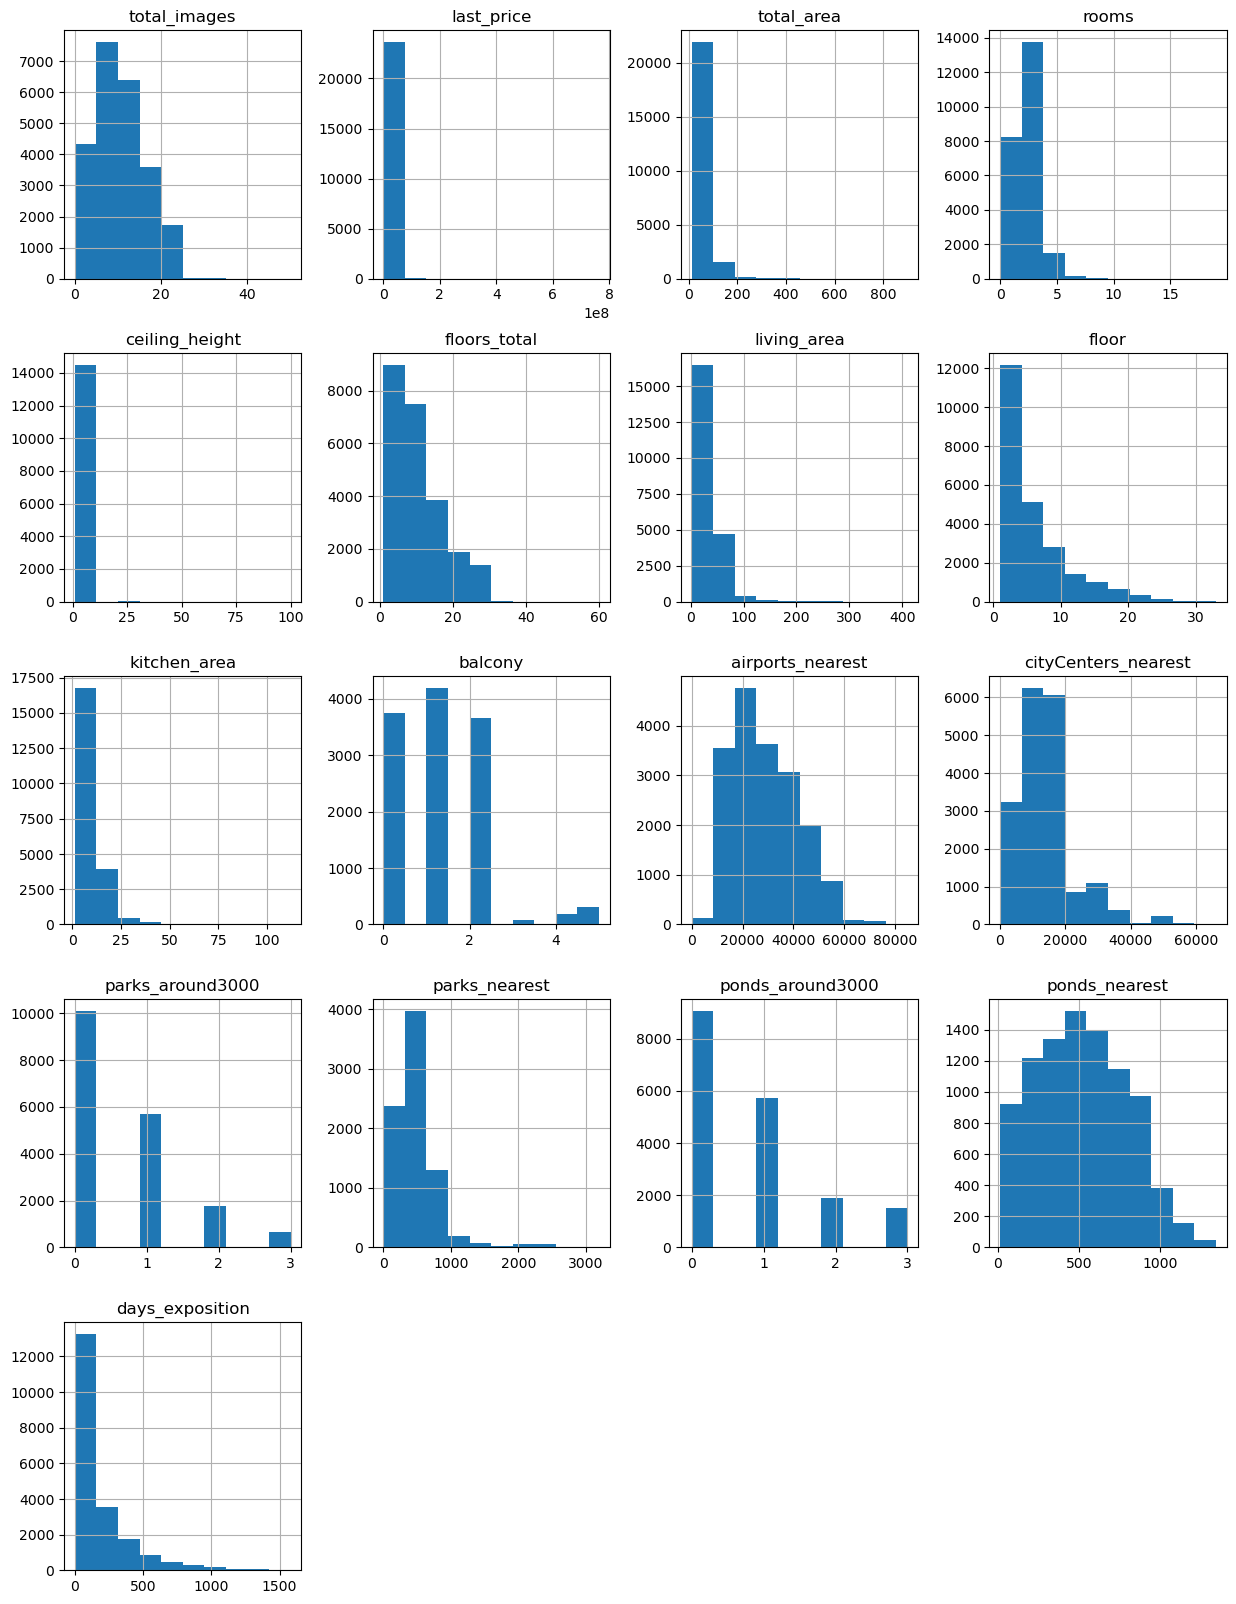

In [5]:
df.hist(figsize=(15, 20))

<div class="alert alert-block alert-info">
Мы можем сделать следующие выовды:
    
    1. Мы видим в графе ceiling_height много пропусков. Вероятно это связано с тем, что многие люди просто не знают точную высоту потолков у себя дома.
    2. Так же мы видим много пропусков в столбцах is_apartment и balcony. Как я думаю это свзяано с тем, что люди у которых нет баклона оставляют графу пустой, а так же те, у кого квартира считают это очевидным по умолчанию, поскольку квартир среди дилой недвижимости намного больше.
    3. Так же мы видим много пропусков в столбцах parks_around3000	parks_nearest	ponds_around3000	ponds_nearest, заполняемых автоматически. Возмонжо, когда рядом с объектом не находится парков или прудов эти графы остаются пустыми.
    4. Гистограммы показывают много выбросов в ceiling_height, last_price, floors_total. 
</div>

### Предобработка данных

In [6]:
#находим пропущенные значения

df.isna().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

In [7]:
df.duplicated().sum()

0

**Как будем заполнять пропущенные значения?**  Некотрые числовые значения такие как ceiling_height, floors_total и т.п. можно спокойно заполнить медианными значениями по каждой из этих категорий. Категории где нужны булевы значения по типу True или False так заполнить не получится. Некоторые столбцы, которые нельзя просто так заполнить, например название населенного пункта, мы просто удалим .

**Почему могли возникнуть пропуски?** По многим причинам. В основном те столбцы, которые заполнялись пользователями возможно не были обязательными для заполнения, поэтому люди оставляли их пустыми. Например, столбец balcony остался у многих незаполненным, потому что люди посчитаьли что не надо ничего туда вписывать, если балкона нет. Тогда эти значения можем заполнить 0. То же самое касается is_apartment. По умолчанию большая часть жилой недвижжимости являются квратирами, поэтому люди могли посчитать эту графу необязательной для заполнения.

Жилую площадь можно попробовать заполнить как разницу общей площади и кухни. Не получилось, потому что и кухни есть пропуски...

In [8]:
#заполним пропуски где можем 

df['balcony'].fillna(0, inplace=True)
df['parks_around3000'].fillna(0, inplace=True)
df['ponds_around3000'].fillna(0, inplace=True)

df['ceiling_height'].fillna(df['ceiling_height'].median(), inplace=True)

df['is_apartment'].fillna(False, inplace=True)
df['is_apartment']=df['is_apartment'].astype(bool)


Название города мы никак не заполним и чтобы они нам не мешали при дальнейших рассчетах, давайте просто удалим строки где не указан город.

In [9]:
df.dropna(subset=['locality_name'], inplace=True)

Можно удалить столбец living_area, поскольку у нас есть отдельные данные по площади кухни, наличию балкона и общей площади. Также удалим столбец про количество картинок, потому что он не особо нужен.

In [10]:
df.drop(['living_area'], axis='columns', inplace=True)
df.drop(['total_images'], axis='columns', inplace=True)

Найдем среднее отношение площади кухни к общей площади и таким образом заполним пропуски по площади кухни.

In [11]:
df['kitchen_part'] = df['kitchen_area'] / df['total_area']
df['kitchen_area'].fillna(df['total_area']*df['kitchen_part'].mean(), inplace=True)
df.drop(['kitchen_part'], axis='columns', inplace=True)#we dont need kitchen part anymore

Расстояние до центра города, до ближайшего аэропорта, парка и водоема просто так заполнить не получится, потому что для крупных городов типа Москвы и Санкт-Петербурга расстояния могут сильно отличаться и медианан тут не поможет. Но чтобы не удалять эти столбцы, поскльку остальные данные могут пригодиться, можем положить туда аномальные значения, чтобы они не мешали при анализе.

In [12]:
df['cityCenters_nearest'].fillna(-1, inplace=True)
df['airports_nearest'].fillna(-1, inplace=True)
df['ponds_nearest'].fillna(-1, inplace=True)
df['parks_nearest'].fillna(-1, inplace=True)
df['days_exposition'].fillna(-1, inplace=True)
df['floors_total'].fillna(-1, inplace=True)

In [13]:
#проверяем результат

df.isna().sum().sort_values()

last_price              0
ponds_around3000        0
parks_nearest           0
parks_around3000        0
cityCenters_nearest     0
airports_nearest        0
locality_name           0
balcony                 0
kitchen_area            0
open_plan               0
studio                  0
is_apartment            0
floor                   0
floors_total            0
ceiling_height          0
rooms                   0
first_day_exposition    0
total_area              0
ponds_nearest           0
days_exposition         0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23650 entries, 0 to 23698
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            23650 non-null  float64
 1   total_area            23650 non-null  float64
 2   first_day_exposition  23650 non-null  object 
 3   rooms                 23650 non-null  int64  
 4   ceiling_height        23650 non-null  float64
 5   floors_total          23650 non-null  float64
 6   floor                 23650 non-null  int64  
 7   is_apartment          23650 non-null  bool   
 8   studio                23650 non-null  bool   
 9   open_plan             23650 non-null  bool   
 10  kitchen_area          23650 non-null  float64
 11  balcony               23650 non-null  float64
 12  locality_name         23650 non-null  object 
 13  airports_nearest      23650 non-null  float64
 14  cityCenters_nearest   23650 non-null  float64
 15  parks_around3000      23

In [15]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])


In [16]:
df.head(30)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,13000000.0,108.00,2019-03-07,3,2.70,16.0,8,False,False,False,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,-1.0
1,3350000.0,40.40,2018-12-04,1,2.65,11.0,1,False,False,False,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0
2,5196000.0,56.00,2015-08-20,2,2.65,5.0,4,False,False,False,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,64900000.0,159.00,2015-07-24,3,2.65,14.0,9,False,False,False,29.792073,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,10000000.0,100.00,2018-06-19,2,3.03,14.0,13,False,False,False,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,2890000.0,30.40,2018-09-10,1,2.65,12.0,5,False,False,False,9.100000,0.0,городской посёлок Янино-1,-1.0,-1.0,0.0,-1.0,0.0,-1.0,55.0
6,3700000.0,37.30,2017-11-02,1,2.65,26.0,6,False,False,False,14.400000,1.0,посёлок Парголово,52996.0,19143.0,0.0,-1.0,0.0,-1.0,155.0
7,7915000.0,71.60,2019-04-18,2,2.65,24.0,22,False,False,False,18.900000,2.0,Санкт-Петербург,23982.0,11634.0,0.0,-1.0,0.0,-1.0,-1.0
8,2900000.0,33.16,2018-05-23,1,2.65,27.0,26,False,False,False,8.810000,0.0,посёлок Мурино,-1.0,-1.0,0.0,-1.0,0.0,-1.0,189.0
9,5400000.0,61.00,2017-02-26,3,2.50,9.0,7,False,False,False,6.500000,2.0,Санкт-Петербург,50898.0,15008.0,0.0,-1.0,0.0,-1.0,289.0


Давайте теперь разберемся с **дубликатами в названиях населенных пунктов**.

In [17]:
len(df['locality_name'].unique())

364

In [18]:
sorted(df['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

In [19]:
df['locality_name'] = df['locality_name'].str.lower()
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=True)
len(df['locality_name'].unique())

330

<div class="alert alert-block alert-info">
Таким образом, мы исключили дубликаты из списка населенных пунктов. Их оказалось немного, но они могли бы помешать при анализе данных по некоторым населенным пунктам.
</div>

### Добавьте в таблицу новые столбцы

Добавим новые столбцы с днями недели, месяцем публикации, годом публикации, цена квадратного метра, тип этажа и расстояние до центра в километрах.

In [20]:
def km(val):
    if val!=-1:
        return val/1000

In [21]:
def floor(row):
    if row['floors_total']!=-1:
        if row['floor']==row['floors_total']:
            return 'последний'
        elif row['floor']==1 or row['floor']==0:
            return 'первый'
        else:
            return 'другой'
    else:
        return 'не известно'

In [22]:
df['day_of_week']=df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

df['sq_price']=(df['last_price']/df['total_area']).round(2)
df['center_km']=df['cityCenters_nearest'].apply(km)
df['floor_kind']=df.apply(floor, axis=1)

In [23]:
df.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,floor,is_apartment,studio,open_plan,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,day_of_week,month,year,sq_price,center_km,floor_kind
0,13000000.0,108.0,2019-03-07,3,2.70,16.0,8,False,False,False,...,482.0,2.0,755.0,-1.0,3,3,2019,120370.37,16.028,другой
1,3350000.0,40.4,2018-12-04,1,2.65,11.0,1,False,False,False,...,-1.0,0.0,-1.0,81.0,1,12,2018,82920.79,18.603,первый
2,5196000.0,56.0,2015-08-20,2,2.65,5.0,4,False,False,False,...,90.0,2.0,574.0,558.0,3,8,2015,92785.71,13.933,другой
3,64900000.0,159.0,2015-07-24,3,2.65,14.0,9,False,False,False,...,84.0,3.0,234.0,424.0,4,7,2015,408176.10,6.800,другой
4,10000000.0,100.0,2018-06-19,2,3.03,14.0,13,False,False,False,...,112.0,1.0,48.0,121.0,1,6,2018,100000.00,8.098,другой


### Исследовательский анализ данных

In [24]:
import numpy as np
np.sort(df['total_area'].unique())

array([ 12. ,  13. ,  13.2, ..., 631. , 631.2, 900. ])

<Axes: >

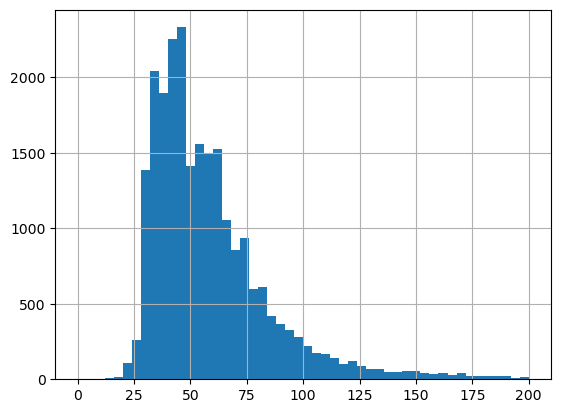

In [25]:
df['total_area'].hist(range=(0,200), bins=50)

<Axes: >

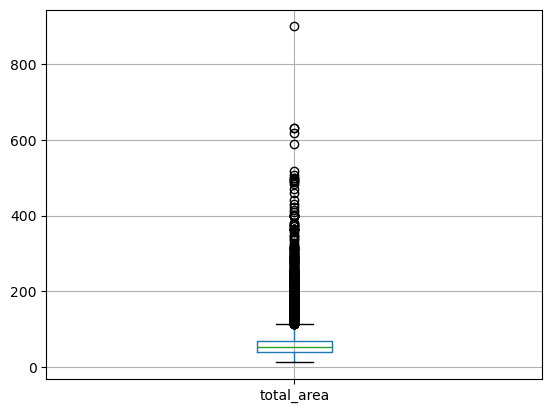

In [26]:
df.boxplot('total_area')

Мы видим очень много точек выше 400, это единичные значение. Мы получаем слишком много выбросов, значений выше максимального значения, которое находится около 150. Давайте избавимся от них и посмотрим что получится

In [27]:
df=df.query('total_area<150')

<Axes: >

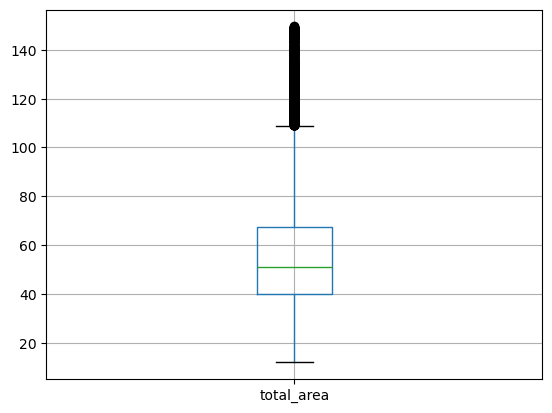

In [28]:
df.boxplot('total_area')

Все-таки максимальное значение 115 кв метров... А минимальное 15

In [29]:
df=df.query('total_area<=115 and total_area>=15')

<Axes: >

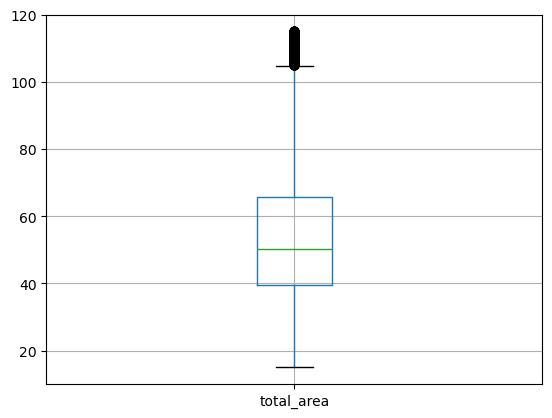

In [30]:
df.boxplot('total_area')

Посмотрим на цену объекта.

array([[<Axes: title={'center': 'last_price'}>]], dtype=object)

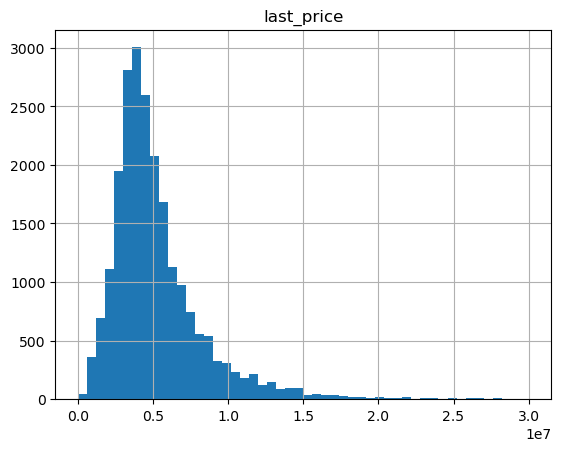

In [31]:
df.hist('last_price', bins=50, range=(1e2,3e7))

Мы видим пик у значения квартир 3-4 миллиона. Очень мало квартир дороже 15 миллионов.

<Axes: >

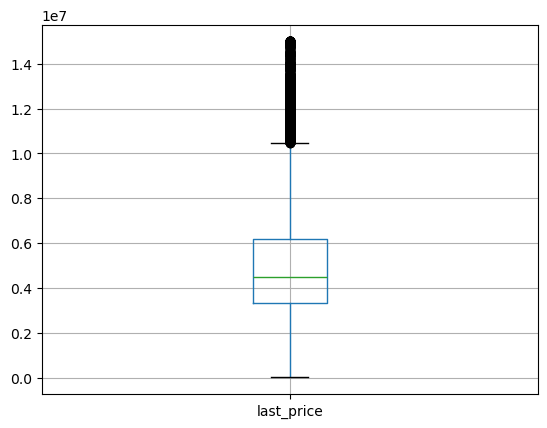

In [32]:
df=df.query('last_price<=1.5e7')
df.boxplot('last_price')

Нормальные значения до 11 млн, оставим только их.

<Axes: >

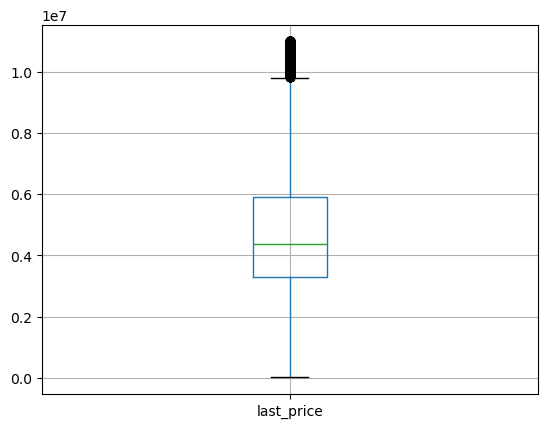

In [33]:
df=df.query('last_price<=1.1e7')
df.boxplot('last_price')

array([[<Axes: title={'center': 'ceiling_height'}>]], dtype=object)

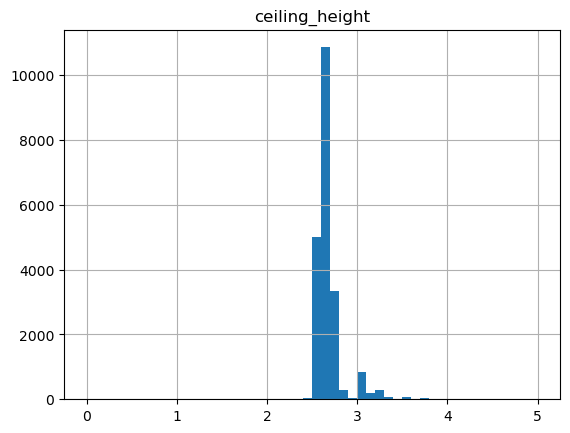

In [34]:
df.hist('ceiling_height', bins=50, range=(0,5))

Как мы видим пик достигается в районе 2,5. Значения меньше 2 и больше 4 можно отбросить.

array([[<Axes: title={'center': 'ceiling_height'}>]], dtype=object)

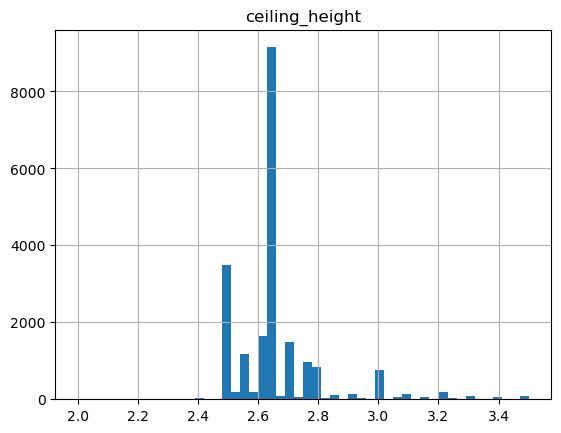

In [35]:
df.hist('ceiling_height', bins=50, range=(2,3.5))

<Axes: >

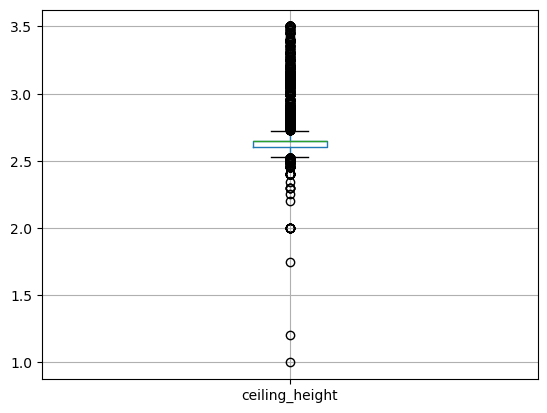

In [36]:
df=df.query('ceiling_height>=1 and ceiling_height<=3.5')
df.boxplot('ceiling_height')

Видим много выбросов меньше 2.5 и больше 2.75 

<Axes: >

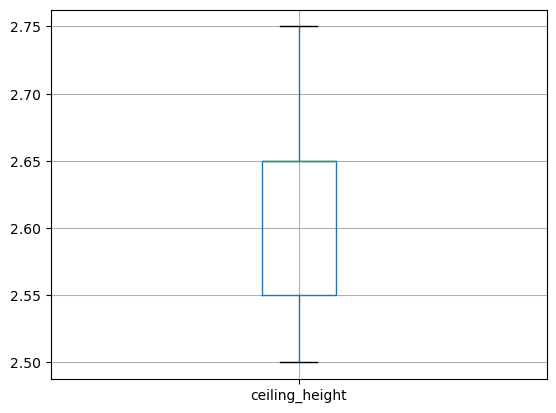

In [37]:
df=df.query('ceiling_height>=2.5 and ceiling_height<=2.75')
df.boxplot('ceiling_height')

Очевидно, что данные о потолках высотой меньше 2 метров являются некорректными, поскольку такое жилье не приспособлено для проживания. Посмотрим что с количеством комнат.

array([[<Axes: title={'center': 'rooms'}>]], dtype=object)

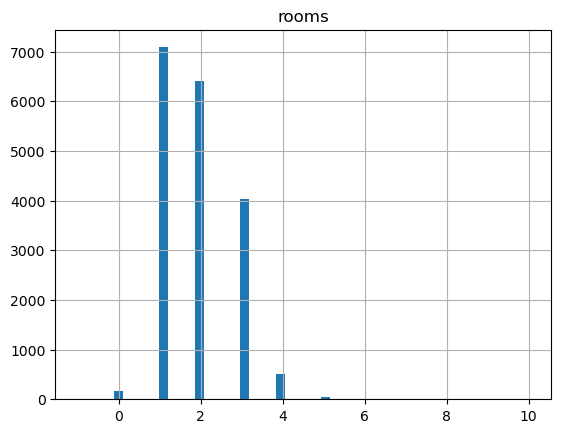

In [38]:
df.hist('rooms', bins=50, range=(-1, 10))

Квартиры с 0 количеством комнат вероятно студии. Построим ящик с усами, посмотрим нормальные значения и оставим только их для анализа.

<Axes: >

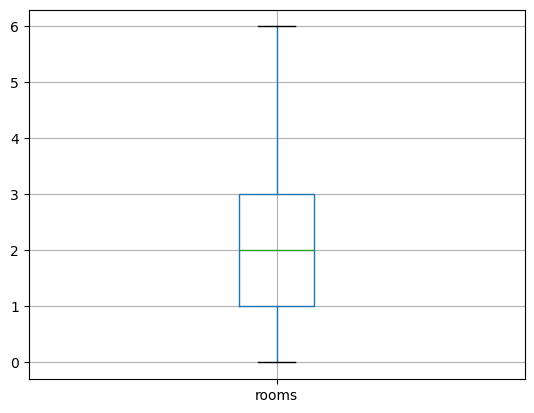

In [39]:
df.boxplot('rooms')

array([[<Axes: title={'center': 'floors_total'}>]], dtype=object)

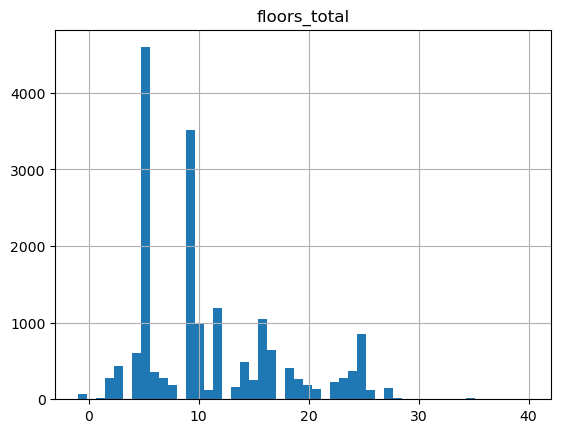

In [40]:
df.hist('floors_total', bins=50, range=(-1, 40))

Есть здания с количеством этажей меньше 0, это не нормально.

<Axes: >

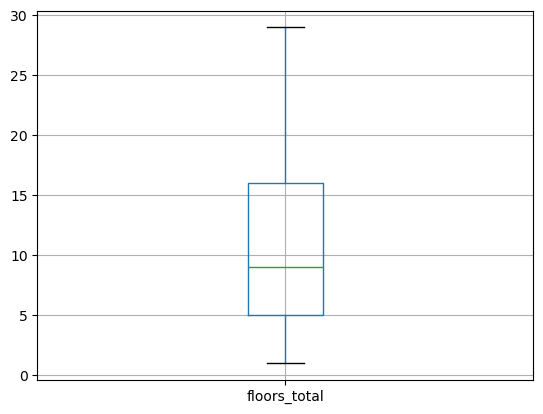

In [41]:
df=df.query('floors_total>0')
#df.boxplot('floors_total')
#видим нормальные значения чуть меньше 30, остаувим только их
df=df.query('floors_total<=30')
df.boxplot('floors_total')

Давайте посмотрим как быстро продаются квартиры.

array([[<Axes: title={'center': 'days_exposition'}>]], dtype=object)

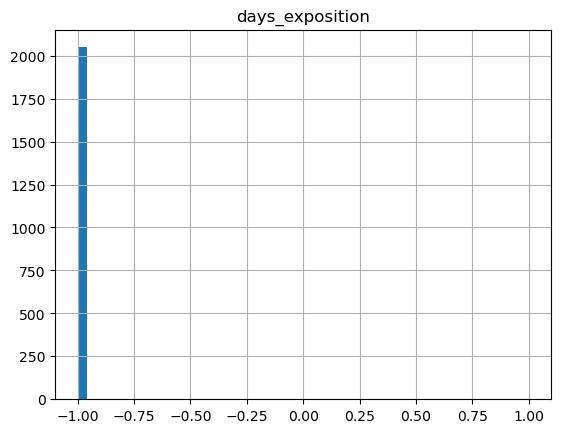

In [42]:
df.hist('days_exposition', bins=50, range=(-1, 1))

Почему-то есть значения -1, это очень странно. Давайте избавимся от них, построим гистограмму, ящик с усами и удалим выбросы.

<Axes: >

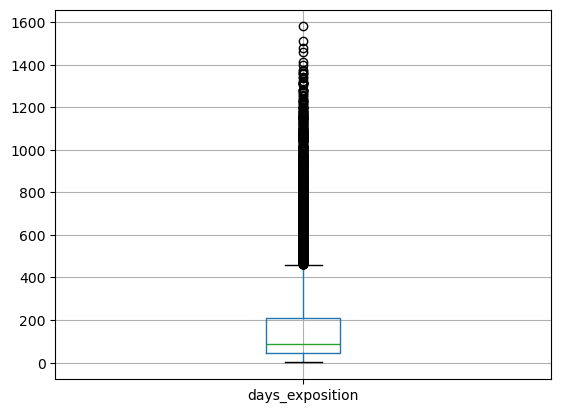

In [43]:
df=df.query('days_exposition>0')
df.boxplot('days_exposition')

<Axes: >

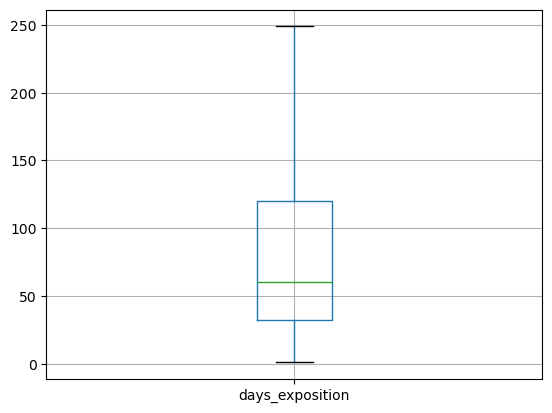

In [44]:
df=df.query('days_exposition<250')
df.boxplot('days_exposition')

array([[<Axes: title={'center': 'days_exposition'}>]], dtype=object)

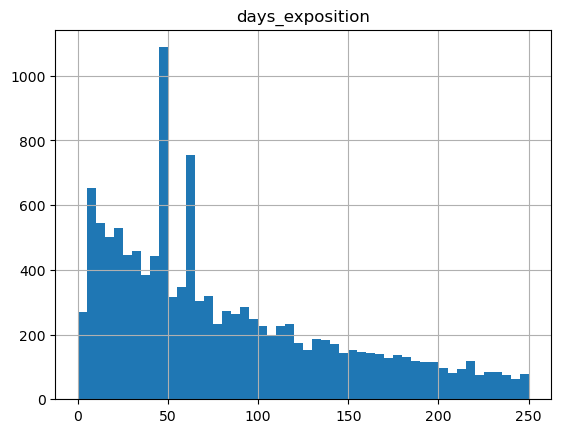

In [45]:
df.hist('days_exposition', bins=50, range=(0,250))

In [46]:
df['days_exposition'].describe()

count    12725.000000
mean        81.105933
std         62.924880
min          1.000000
25%         32.000000
50%         60.000000
75%        120.000000
max        249.000000
Name: days_exposition, dtype: float64

In [47]:
df['days_exposition'].median()

60.0

Мы видим на гистограме, что пик продаж наступает примерно на 50-60 дней, что соответсвует медианному значению. Таким образом, мы можем предположить, что быстрыми можно назвать продажи, совершенные ранее чем через 50-60 дней. После этого значения на гистограме начинают падать. Мы видим из статистики по нашему столбцу, что 75% недвижимости продается менее чем за 120 дней. Таким образом, мы можем утверждать, что квартиры, продаваемые более 120 дней, продаются долго.

Посмотрим какие факторы больше всего влияют на стоимость объекта.

<Axes: xlabel='total_area', ylabel='last_price'>

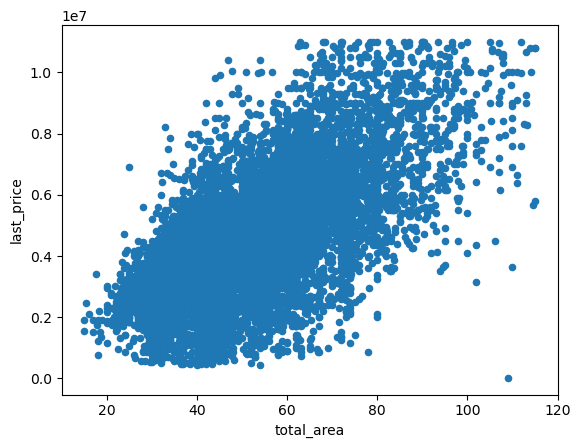

In [48]:
df.plot(y='last_price', x='total_area', kind='scatter')

total area: 0.675450606244293
rooms 0.43108316039644085
kitchen_area 0.4692792458059863


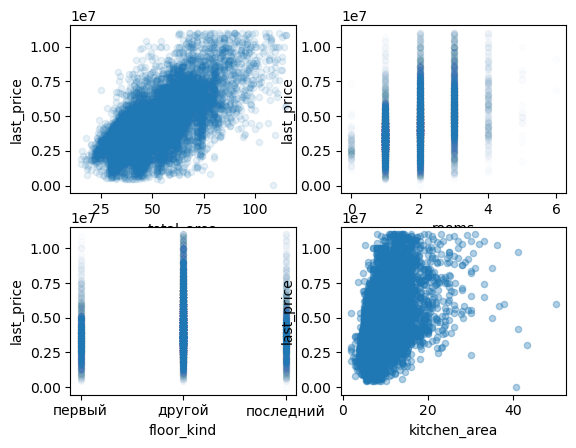

In [49]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=2)
df.plot(y='last_price', x='total_area', kind='scatter', alpha=0.1, ax=axes[0,0])
df.plot(y='last_price', x='rooms', kind='scatter', alpha=0.01, ax=axes[0,1])
df.plot(y='last_price', x='floor_kind', kind='scatter', alpha=0.01, ax=axes[1,0])
df.plot(y='last_price', x='kitchen_area', kind='scatter', alpha=0.35,ax=axes[1,1])
print('total area:', df['last_price'].corr(df['total_area']))
print('rooms', df['last_price'].corr(df['rooms']))
print('kitchen_area', df['last_price'].corr(df['kitchen_area']))

1. Из этих графиков мы можем сделать следующий вывод. Наиболее близким к 1 коэффицент Пирсона из всех параметров был только у общей площади жилья. Таким образом, взглянув при этом на получившиеся графики мы можем сделать вывод, что общая площадь жилья наибольшим образом влияет на формирование стоимости жилья.
2. По количеству комнат тяжело сделать какие-то однозначные выводы. Мы видим, что сильно отличаются от соседних только цены на студии и на 4-х комнатные квартиры. Цены же на 1, 2, 3 комнатные квартиры лежат примерно в одном диапозоне, хотя на однокомнатные цены несильно, но ниже чем на двухкомнатные. Это же нам и показывает коэффицент Пирсона, который оказался меньше 0.5. 
3. Что касается типа этажа, то единственное, что мы можем увидеть это то, что цены на квартиры на первом этаже ниже остальных.
4. Площадь кухни так же в небольшой степени влияет на стоимость квартры. То есть толкьо тогда когда площадь кухни больше 20, тогда и дорогих квартир становится больше. А так при одинаковых площадях мы видим представлены разные цены.

<Axes: xlabel='year', ylabel='last_price'>

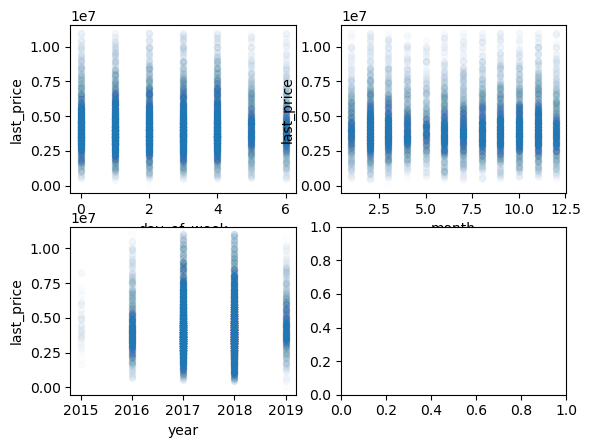

In [50]:
fig, axes = plt.subplots(nrows=2, ncols=2)
df.plot(y='last_price', x='day_of_week', kind='scatter', alpha=0.01, ax=axes[0,0])
df.plot(y='last_price', x='month', kind='scatter', alpha=0.01, ax=axes[0,1])
df.plot(y='last_price', x='year', kind='scatter', alpha=0.01, ax=axes[1,0])

Тут особо никаких выводов мы сделать не можем, потому что цена не сильно зависит от дня недели или месяца. Однако, мы видим, что в 2017-2018 годах квартиры были дороже чем в последующем 2019. При это еще видно, что и объявлений было гораздо меньше в 2015-2016, при этом и цены тогда были гораздо ниже.

In [51]:
df['locality_name'].value_counts().head(10)

locality_name
санкт-петербург      7905
поселок мурино        440
поселок шушары        312
колпино               240
поселок парголово     237
всеволожск            222
деревня кудрово       207
гатчина               188
пушкин                184
выборг                146
Name: count, dtype: int64

In [52]:
df2 = df.loc[:, ['locality_name', 'sq_price']]
df2 = df2.pivot_table(index='locality_name', values='sq_price', aggfunc=['count', 'mean'])
df2=df2.sort_values(by=('count', 'sq_price'), ascending=False).head(10)
df2.sort_values(by=('mean', 'sq_price'), ascending=False).head(10)

,count,mean
,sq_price,sq_price
locality_name,,
санкт-петербург,7905,102613.203132
пушкин,184,98457.861141
деревня кудрово,207,92682.710097
поселок парголово,237,89258.681392
поселок мурино,440,86017.170159
поселок шушары,312,78119.115064
колпино,240,74768.005583
гатчина,188,68345.334309


Тут мы видим, что самый дорогой квадратный метр в среднем в Санкт-Петербурге, в то время как самый дешевы в Выборге, где он чуть меньше чем в 2 раза дешевле.

C:\Users\Huawei\AppData\Local\Temp\ipykernel_20348\665196764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spb['cityCenters_nearest'] = (df_spb['cityCenters_nearest']/1000).round().astype(int)
C:\Users\Huawei\AppData\Local\Temp\ipykernel_20348\665196764.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spb['last_price'] = df_spb['last_price']/1000000


<Axes: xlabel='cityCenters_nearest'>

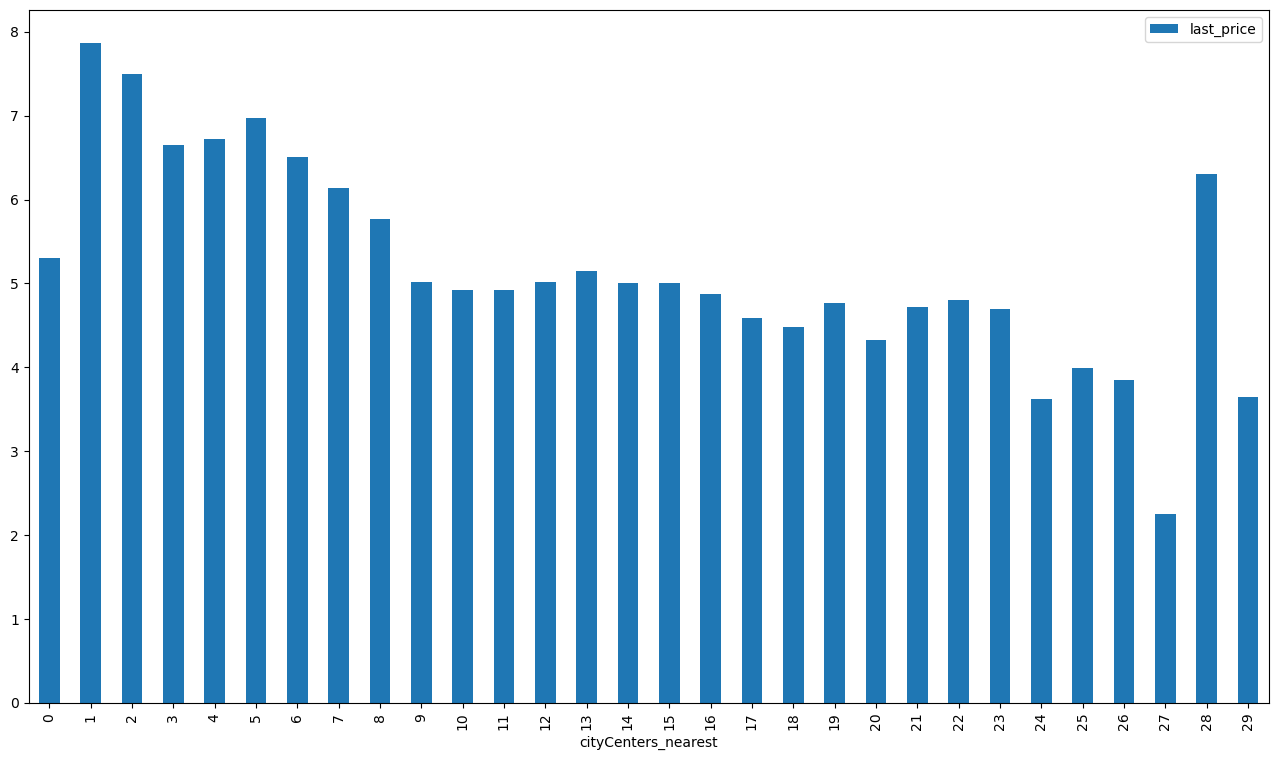

In [145]:
df_spb=df.query('locality_name=="санкт-петербург" & cityCenters_nearest!=-1')
df_spb['cityCenters_nearest'] = (df_spb['cityCenters_nearest']/1000).round().astype(int)
df_spb['last_price'] = df_spb['last_price']/1000000
df_spb_pivot=df_spb.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='mean')
df_spb_pivot.plot(y='last_price', kind='bar', figsize=(16,9))

Сначла может показаться, что можно сделать очевидный вывод, что чем ближе к центру, тем дороже в среднем квартиры. Однако мы видим, что при значении 28 цены на квартиры резко взлетают. Возможно на таком растоянии от центра находится какой-то особенный район, где квартиры дороже.

### Общий вывод

1. На продажи квартиры обычно уходит до 120 дней.
2. Стоимость квартиры в основном зависит от ее общей площади.
3. В среднем в Санкт-Петербурге и Пушкине самый дорогой квадратный метр, в то время как самый дешевый в Выборге. 
4. Квартиры на 1 и последнем этажах в среднем стоят дешевле, чем на других.